<h1>Lending Club: Loan Default Prediction</h1>

<h3>Data</h3>
The Data we will be using is obtained from Kaggle <a>https://www.kaggle.com/datasets/wordsforthewise/lending-club</a>

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

<h3>Our Goal</h3>

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

<b>NOTE : </b>Since we are trying to predict whether or not borrower is going to default on the loan we will be using only the file containing data of accepted loans.

___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv')

C:\Users\sudhn\AppData\Local\Temp\ipykernel_11884\3701891125.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q4.csv')


In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [4]:
pd.set_option('display.max_columns', 200)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

<h3>Data Cleaning</h3>

In [6]:
pd.DataFrame(df.isnull().sum()).T

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,2260701,33,33,33,33,33,33,33,33,167002,146940,33,37,33,33,33,33,33,2134636,33,23359,34,33,1744,62,62,33,33,63,1158535,1901545,62,62,33,1835,62,33,33,33,33,33,33,33,33,33,33,2460,33,1345343,105,33,33,178,1679926,33,33,2139991,2139995,2144971,62,70309,70309,866163,866162,866162,866162,909957,866162,1068883,866162,866162,866162,866381,70309,866162,866163,866163,50063,70379,74968,76104,178,62,139104,70310,70310,70309,50063,73445,1741000,295468,1520342,70309,70309,70309,58623,70309,70309,70309,70310,70309,58623,153690,70309,70309,70309,70464,75412,1398,138,70309,50063,50063,70309,2152681,2152680,2152680,2152680,2152680,2152680,2152680,2154517,2152680,2152680,2152680,2152680,2224759,33,2249784,2249784,2249784,2249784,2249784,2249784,2249784,2249784,2249784,2249784,2249784,2252050,2249784,2249784,33,33,2226455,2226455,2226455,2226455,2226455,2226455


Most of the features have mostly null values, hence removing features containing 70% or more null values.

In [7]:
threshold = 70*df.shape[0]/100
column_list = df.columns

to_be_dropped = []
for c in column_list:
    if((df[c].isnull().sum()) > 1000000):
        to_be_dropped.append(c)

In [8]:
to_be_dropped

['member_id',
 'desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'il_util',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_d

In [9]:
df.drop(axis=1, columns=to_be_dropped, inplace=True)

In [10]:
df.shape

(2260701, 106)

___

Removing rows that have more than 70% of the data missing.

In [11]:
df = df.loc[(df.isnull().sum(axis=1)/df.shape[1])*100 < 70].copy(deep=True)

____

In [12]:
pd.DataFrame(df.isnull().sum()).T

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,0,0,0,0,0,0,0,0,0,166969,146907,0,4,0,0,0,0,0,0,23326,1,0,1711,29,29,0,0,30,29,29,0,1802,29,0,0,0,0,0,0,0,0,0,0,2427,0,72,0,0,145,0,0,29,70276,70276,866130,866129,866129,866129,909924,866129,866129,866129,866129,866348,70276,866129,866130,866130,50030,70346,74935,76071,145,29,139071,70277,70277,70276,50030,73412,295435,70276,70276,70276,58590,70276,70276,70276,70277,70276,58590,153657,70276,70276,70276,70431,75379,1365,105,70276,50030,50030,70276,0,0,0


#### 'loan_amnt', 'funded_amnt' and 'funded_amnt_inv'

In [13]:
(df['loan_amnt'] - df['funded_amnt']).value_counts()

0.0        2258603
5000.0          16
3625.0          13
8000.0          12
7500.0          12
            ...   
17950.0          1
12575.0          1
10900.0          1
10875.0          1
21150.0          1
Name: count, Length: 529, dtype: int64

In [14]:
2258603/2260701

0.9990719692697089

the feature 'funded_amnt' is 99.9% same as feature 'loan_amnt' hence most of the amount of the loan is provided to the borrower therefore we will only consider 'loan_amnt', hence drop 'funded_amnt'.

'funded_amnt_inv' stands for amount funded by investors at that time, we are trying to find out probability of default, therefore considering only the amount sanctioned i.e 'loan_amnt' is sufficient and it would not be useful to get into the details of who funded the loan amount.

Therefore drop both the ['funded_amnt', 'funded_amnt_inv']

In [15]:
df.drop(axis=1, columns=['funded_amnt', 'funded_amnt_inv'], inplace=True)

___

####  ['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verfication_status', 'loan_status'] 
we keep these features and experiment with them later.
___

#### 'issue_d'
Refers to date the loan was issued. 

We are trying to predict the probability that the borrower will default based on their past records before issueing the loan. Hence the feature becomes irrelavent. 

In [16]:
df.drop(axis=1, columns=['issue_d'], inplace=True)

___

#### 'pymnt_plan'

In [17]:
df['pymnt_plan'].value_counts()

pymnt_plan
n    2260048
y        620
Name: count, dtype: int64

In [18]:
620/2260048

0.0002743304566982648

In [19]:
df.drop(axis=1, columns=['pymnt_plan'], inplace=True)

The difference between the two labels is so significant that the feature won't be having any effect at all,
hence we dropped 'pymnt_plan'.
___

#### 'url'

The url links to listing data on Lending Club's website,
hence it is just like metadata, so we drop 'url'.

In [20]:
df.drop(axis=1, columns=['url'], inplace=True)

___

#### 'purpose'

In [21]:
df['purpose'].value_counts()

purpose
debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: count, dtype: int64

There are not many categories here so we try keeping this feature and experiment with it later.
___

In [22]:
df[['title', 'purpose']]

,title,purpose
0,Debt consolidation,debt_consolidation
1,Business,small_business
2,NaN,home_improvement
3,Debt consolidation,debt_consolidation
4,Major purchase,major_purchase
...,...,...
2260694,Home improvement,home_improvement
2260695,Debt consolidation,debt_consolidation
2260696,NaN,debt_consolidation
2260697,Debt consolidation,debt_consolidation


'title' and 'purpose' are nearly same but 'title' has more missing values than 'purpose', hence drop 'title'

In [23]:
df.drop(axis=1, columns=['title'], inplace=True)

___

#### 'zip_code'


In [24]:
df['zip_code']

0          190xx
1          577xx
2          605xx
3          076xx
4          174xx
           ...  
2260694    356xx
2260695    840xx
2260696    907xx
2260697    334xx
2260698    770xx
Name: zip_code, Length: 2260668, dtype: object

The zip_codes are not actually complete, hence we drop this feature.

In [25]:
df.drop(axis=1, columns=['zip_code'], inplace=True)

___

In [26]:
df['delinq_2yrs'].value_counts()

delinq_2yrs
0.0     1839108
1.0      281353
2.0       81289
3.0       29542
4.0       13179
5.0        6599
6.0        3717
7.0        2062
8.0        1223
9.0         818
10.0        556
11.0        363
12.0        263
13.0        165
14.0        120
15.0         87
16.0         55
18.0         30
17.0         30
19.0         23
20.0         17
21.0         12
22.0          5
24.0          4
26.0          3
30.0          2
25.0          2
23.0          2
29.0          2
27.0          1
39.0          1
28.0          1
32.0          1
58.0          1
35.0          1
42.0          1
36.0          1
Name: count, dtype: int64

#### ['addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_ln']
retaining these features for further exploration.
___

#### ['fico_range_low', 'fico_range_high']
The FICO score directly gives the level of risk before lending hence we will drop the FICO score in order to train our model unbiasedly based on other features.

In [27]:
df.drop(axis=1, columns=['fico_range_low', 'fico_range_high'], inplace=True)

___

#### ['inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',	'total_acc', 'initial_list_status']
Feature 'inq_last_6mths' is logically irrelevant to our target feature, hence we drop this feature while retaining remaining features in order to explore later.

In [28]:
df.drop(axis=1, columns=['inq_last_6mths'], inplace=True)

___
#### 'out_prncp'
Remaining outstanding principal for total amount
#### 'out_prncp_inv'
Remaining outstanding principal for portion of total amount funded by investors

Logically these two columns are irrelevant,
hence drop these two columns.


In [29]:
df.drop(axis=1, columns=['out_prncp', 'out_prncp_inv'], inplace=True)

___

#### ['total_pymnt', 'total_pymnt_inv']
Both the features refer to Payments received to date for total amount funded, because we are predicting probability before lending the money we drop these features.

In [30]:
df.drop(axis=1, columns=['total_pymnt', 'total_pymnt_inv'], inplace=True)

___

#### 'total_rec_prncp'
This feature refers to Principal received to date
### 'total_rec_int'
This feature refers to Interest recieved to date, 
similarly,
#### ['total_rec_late_fee',	'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',	'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med']

All these feature refer to values that can only be obtained after lending the money, hence we drop all of these features as we are trying to predict the probability of default before the loan being sanctioned.

In [31]:
df.drop(axis=1, columns=['total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',	'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',	'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med'], inplace=True)

___

#### 'acc_now_delinq'
This feature refers to The number of accounts on which the borrower is delinquent.

In [32]:
df['acc_now_delinq'].value_counts()

acc_now_delinq
0.0     2251857
1.0        8293
2.0         421
3.0          50
4.0          11
5.0           3
6.0           2
14.0          1
7.0           1
Name: count, dtype: int64

Even if we feature engineer and create two features from this 'acc_now_delinq' feature, as 'no_delinq' which will refer to borrowers which are delinquent on 0 accounts and 'delinq' which will refer to borrowers which are delinquent on 1 or more than 1 accounts, the difference between the number of records belonging to each feature will be so large that the overall effect will be next to none.

hence we drop 'acc_now_delinq'.  

In [33]:
df.drop(axis=1, columns=['acc_now_delinq'], inplace=True)

___

#### 'policy_code'

In [34]:
df['policy_code'].value_counts()

policy_code
1.0    2260668
Name: count, dtype: int64

since there exists no other policy code type, this feature will have no effect, hence drop this feature.

In [35]:
df.drop(axis=1, columns=['policy_code'], inplace=True)

___

#### 'application_type'

In [36]:
df['application_type'].value_counts()

application_type
Individual    2139958
Joint App      120710
Name: count, dtype: int64

Retaining feature 'application_type' for further analysis.
___

#### 'tot_coll_amt'
Refers to total collection amounts ever owed.

In [37]:
df['tot_coll_amt'].value_counts()

tot_coll_amt
0.0        1856129
50.0          3924
100.0         3250
75.0          2489
200.0         1911
            ...   
39768.0          1
15851.0          1
9251.0           1
26632.0          1
19970.0          1
Name: count, Length: 15574, dtype: int64

this is again similar to the case of 'acc_now_delinq' feature, hence we drop this feature. 

In [38]:
df.drop(axis=1, columns=['tot_coll_amt'], inplace=True)

___

#### 'tot_cur_bal'
Refers to total current balance of all accounts.

we retain this feature for further exploration.
___

#### ['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths']
All these feature are useless as we trying to predict before lending money, hence drop these features.

In [39]:
df.drop(axis=1, columns=['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths'], inplace=True)

___

Now we have two features, 'tot_cur_bal' and 'avg_cur_bal'. 'avg_cur_bal' might not be good enough considering cases in which some accounts may have very high balance and some very low balance, hence we are dropping 'avg_cur_bal', and retaining 'tot_cur_bal'.

In [40]:
df.drop(axis=1, columns=['avg_cur_bal'], inplace=True)

___

#### ['bc_open_to_buy', 'bc_util']
between the two features we will keep 'bc_util' as it is the ratio total current balance to high credit / credit limit for all bankcard accounts and drop 'bc_open_to_buy' as it refers to total credit limit on all bankcards.

In [41]:
df.drop(axis=1, columns=['bc_open_to_buy'], inplace=True)

___

#### ['initial_list_status', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'debt_settlement_flag']
All these feature are useless as we trying to predict before lending money, hence drop these features.

In [42]:
df.drop(axis=1, columns=['initial_list_status', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'debt_settlement_flag'], inplace=True)

___

#### 'mort_acc'
refers to number of mortgage accounts.

keeping this feature to analyse later.
___

#### ['mths_since_recent_bc', 'mths_since_recent_inq']
Both the features refer to details about most recent bankard opened and inquired.

hence we drop both the features.

In [43]:
df.drop(axis=1, columns=['mths_since_recent_bc', 'mths_since_recent_inq'], inplace=True)

___

#### ['num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m']
refer Lending Club Dictionary for definations of all features.

retaining only following features

['num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', ]

In [44]:
df.drop(axis=1, columns=['num_accts_ever_120_pd', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m'], inplace=True)

___

#### 'pct_tl_nvr_dlq'
retaining this feature to explore later.
___
#### 'percent_bc_gt_75'
droping this feature as it is same as 'bc_util' feature, it only imposes a filter over 'bc_util' ratio.

In [45]:
df.drop(axis=1, columns=['percent_bc_gt_75'], inplace=True)

___

#### 'pub_rec_bankruptcies'

In [46]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0     1987383
1.0      258444
2.0       10518
3.0        2131
4.0         541
5.0         188
6.0          60
7.0          23
8.0          10
9.0           3
11.0          1
12.0          1
Name: count, dtype: int64

In [47]:
(df.shape[0] - 1987383) / 1987383 

0.1375099817196786

we can turn it into categorical variable having only two categories, and 13.75% data belongs to one label of 1 or more than 1 bankruptcies, so we can do further analysis later.
___

#### 'tax_liens'

In [48]:
df['tax_liens'].value_counts()

tax_liens
0.0     2195933
1.0       43638
2.0       12172
3.0        4456
4.0        2007
5.0        1026
6.0         557
7.0         265
8.0         160
9.0         103
10.0         75
11.0         40
12.0         26
13.0         17
15.0         14
14.0         12
17.0          8
21.0          6
16.0          6
18.0          6
22.0          5
20.0          3
19.0          3
27.0          3
61.0          2
45.0          2
24.0          2
46.0          2
29.0          1
44.0          1
30.0          1
52.0          1
37.0          1
39.0          1
63.0          1
34.0          1
28.0          1
25.0          1
48.0          1
53.0          1
23.0          1
85.0          1
Name: count, dtype: int64

we can treat this same as 'pub_rec_bakruptcies'
___

#### ['tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']
since we have retained 'bc_util' and other features that provide info about current bankcards ,we are going to drop 'tot_hi_cred_lim' and 'total_bc_limit', 'total_il_credit_limit'

also, we will drop 'total_cur_bal' and retain 'total_bal_ex_mort'

In [49]:
df.drop(axis=1, columns=['tot_hi_cred_lim', 'tot_cur_bal', 'total_bc_limit', 'total_il_high_credit_limit'], inplace=True)

___

#### 'hardship_flag'

In [50]:
df['hardship_flag'].value_counts()

hardship_flag
N    2259836
Y        832
Name: count, dtype: int64

The difference between two labels is so large that the feature becomes insignificant.

In [51]:
df.drop(axis=1, columns=['hardship_flag'], inplace=True)

___

#### 'disbursement method'

In [52]:
df['disbursement_method'].value_counts()

disbursement_method
Cash         2182546
DirectPay      78122
Name: count, dtype: int64

we keep this feature
___

### We have completed preliminary elimination of some unneccessary features now we will handle the remaining missing values.

Converting 'tax_liens' and 'pub_rec_bankruptcies' into categorical variable.

In [53]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2.,  3.,  8.,  4.,  6.,  5.,  7.,  9., 11., 12., nan])

In [54]:
df['pub_rec_bankruptcies'].replace([1.,  2.,  3.,  8.,  4.,  6.,  5.,  7.,  9., 11., 12.], 1, inplace=True)

C:\Users\sudhn\AppData\Local\Temp\ipykernel_11884\253116756.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pub_rec_bankruptcies'].replace([1.,  2.,  3.,  8.,  4.,  6.,  5.,  7.,  9., 11., 12.], 1, inplace=True)


In [55]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1., nan])

In [56]:
df['pub_rec_bankruptcies']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2260694    0.0
2260695    0.0
2260696    0.0
2260697    1.0
2260698    0.0
Name: pub_rec_bankruptcies, Length: 2260668, dtype: float64

similarly process 'tax_liens'

In [57]:
df['tax_liens'].unique()

array([ 0.,  2.,  1.,  3.,  5.,  4., 10.,  7.,  6.,  9.,  8., 22., 12.,
       11., 25., 17., 15., 13., 27., 85., 21., 18., 16., 46., 14., 52.,
       19., 29., 44., 30., 45., 20., 37., 39., 63., 34., nan, 28., 61.,
       48., 53., 23., 24.])

In [58]:
df['tax_liens'].replace([1., 10., 22., 25., 17., 15., 13., 27., 85., 21., 18., 16.,
       46., 14., 52., 19., 29., 44., 30., 45., 20., 37., 39., 63.,
       34., 28., 61., 48., 53., 23., 24.], 1, inplace=True)

C:\Users\sudhn\AppData\Local\Temp\ipykernel_11884\4005435029.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tax_liens'].replace([1., 10., 22., 25., 17., 15., 13., 27., 85., 21., 18., 16.,


In [59]:
df['tax_liens'].unique()

array([ 0.,  2.,  1.,  3.,  5.,  4.,  7.,  6.,  9.,  8., 12., 11., nan])

In [60]:
df['tax_liens'].replace([2.,  1.,  3.,  5.,  4.,  7.,  6.,  9.,  8., 12., 11.], 1, inplace=True)

C:\Users\sudhn\AppData\Local\Temp\ipykernel_11884\311078999.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tax_liens'].replace([2.,  1.,  3.,  5.,  4.,  7.,  6.,  9.,  8., 12., 11.], 1, inplace=True)


In [61]:
df['tax_liens'].unique()

array([ 0.,  1., nan])

____

In [62]:
pd.DataFrame(df.isnull().sum()).T

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,bc_util,mort_acc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,disbursement_method
0,0,0,0,0,0,0,0,166969,146907,0,4,0,0,0,0,1711,29,29,29,29,0,1802,29,0,76071,50030,70276,70276,58590,70431,1365,105,50030,0


___
#### 'emp_title'

In [63]:
df['emp_title'].value_counts()

emp_title
Teacher                                38824
Manager                                34298
Owner                                  21977
Registered Nurse                       15867
Driver                                 14753
                                       ...  
Electronic System Engineer                 1
Substitute Teacher/Paraprofessional        1
eligiblity worker                          1
Escalated Customer Service Advisor         1
Current Operations Officer                 1
Name: count, Length: 512694, dtype: int64

There are too many employee titles, so it will be difficult to create dummy variables over this feature, hence we drop this feature.

In [64]:
df.drop(axis=1, columns=['emp_title'], inplace=True)

___

#### 'emp_length'

<Axes: xlabel='emp_length', ylabel='count'>

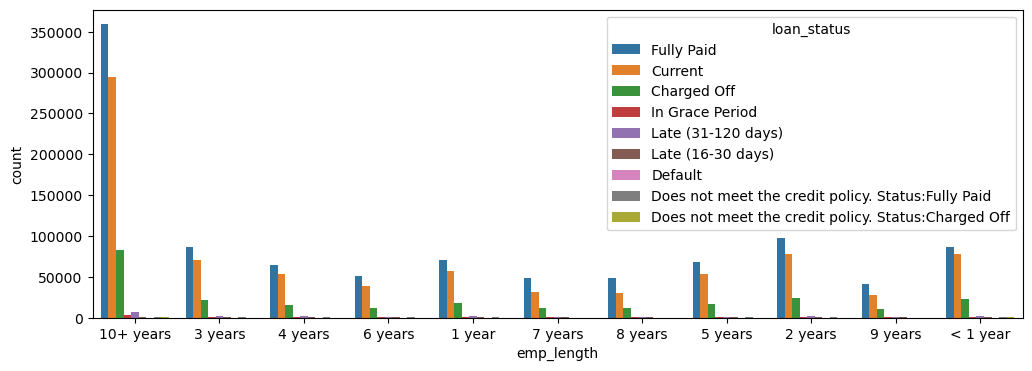

In [65]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='emp_length', hue='loan_status')

from this it occurs that there are several labels in target variable, so we first deal with our target variable

In [66]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

We are trying to predict whether or not the borrower will default on the loan, so there can be only two categories in target variable; either the borrower pays the entire loan 'Fully Paid' or the borrower fails to pay the loan and the Lending Club needs to Charge Off the loan. 

In [67]:
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')].copy(deep=True)

In [68]:
pd.DataFrame(df.isnull().sum()).T

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,bc_util,mort_acc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,disbursement_method
0,0,0,0,0,0,0,0,78511,0,0,0,0,0,0,374,0,0,0,0,0,857,0,0,61912,47281,67527,67527,55841,67681,697,39,47281,0


Now back to 'emp_length' feature

<Axes: xlabel='emp_length', ylabel='count'>

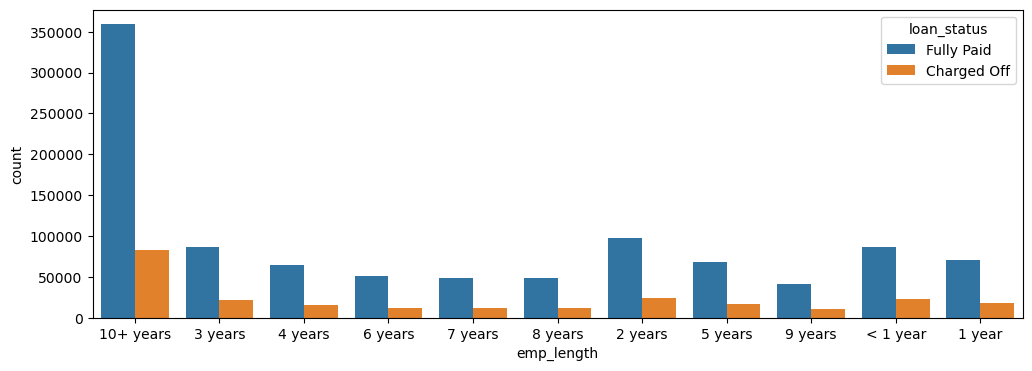

In [69]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='emp_length', hue='loan_status')

The ratio of charged off over fully paid for each category will give us a better understanding.

In [70]:
fp = fp = df.loc[df['loan_status'] == 'Fully Paid']['emp_length'].value_counts()

In [71]:
co = df.loc[df['loan_status'] == 'Charged Off']['emp_length'].value_counts()

In [72]:
co/fp

emp_length
1 year       0.258877
10+ years    0.231265
2 years      0.246996
3 years      0.249515
4 years      0.245917
5 years      0.243796
6 years      0.239954
7 years      0.242063
8 years      0.248966
9 years      0.248456
< 1 year     0.258294
Name: count, dtype: float64

<Axes: xlabel='emp_length', ylabel='count'>

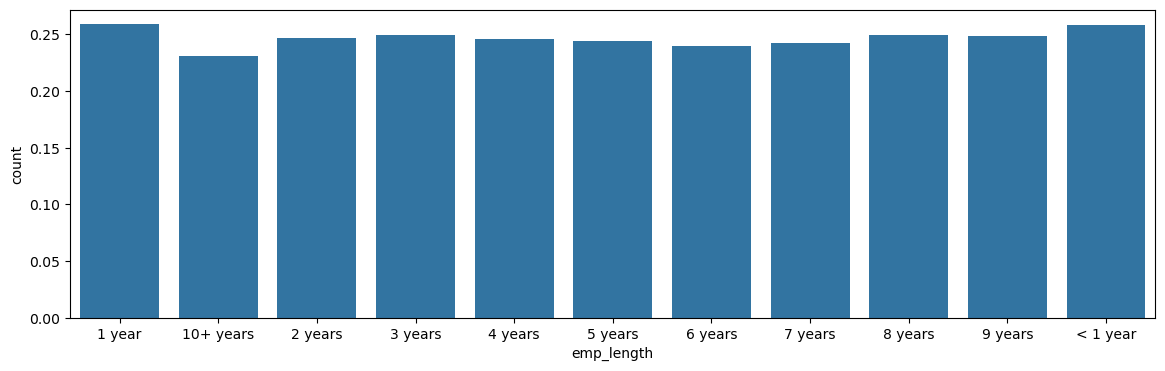

In [73]:
plt.figure(figsize=(14, 4))
sns.barplot(co/fp)

So the barplot shows us that there is no significant difference between (charged off / fully paid) ratio across all the employment lengths.

Drop 'emp_length'

In [74]:
df.drop(axis=1, columns=['emp_length'], inplace=True)

___

#### 'bc_util'

In [75]:
df[df['bc_util'].isnull()]

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,bc_util,mort_acc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,disbursement_method
101,68416256,5000.0,36 months,9.80,160.87,B,B3,OWN,72000.0,Not Verified,Fully Paid,other,NC,6.52,0.0,Jan-2002,11.0,1.0,4838.0,56.3,20.0,Individual,NaN,2.0,0.0,3.0,0.0,100.0,1.0,0.0,20751.0,Cash
254,68506699,4675.0,36 months,17.27,167.31,D,D3,MORTGAGE,13000.0,Not Verified,Fully Paid,credit_card,MI,34.07,1.0,Nov-1996,6.0,0.0,3394.0,44.1,23.0,Individual,NaN,0.0,0.0,3.0,0.0,86.4,0.0,0.0,39353.0,Cash
318,68416651,4900.0,36 months,13.44,166.15,C,C3,MORTGAGE,123000.0,Not Verified,Fully Paid,debt_consolidation,FL,25.60,0.0,Jan-1988,8.0,0.0,4792.0,64.8,16.0,Individual,NaN,2.0,0.0,1.0,0.0,81.2,0.0,0.0,66044.0,Cash
371,68366762,2400.0,36 months,13.44,81.38,C,C3,RENT,26000.0,Source Verified,Fully Paid,debt_consolidation,WA,16.39,0.0,Nov-2011,7.0,0.0,1869.0,35.3,8.0,Individual,NaN,0.0,0.0,4.0,0.0,100.0,0.0,0.0,11041.0,Cash
374,68587393,7000.0,36 months,12.88,235.46,C,C2,OWN,55000.0,Source Verified,Fully Paid,other,AZ,37.22,0.0,May-1988,4.0,0.0,34441.0,0.0,6.0,Individual,NaN,0.0,1.0,1.0,1.0,100.0,0.0,0.0,52076.0,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259351,90410087,35000.0,36 months,13.99,1196.05,C,C3,MORTGAGE,146000.0,Verified,Fully Paid,debt_consolidation,TX,21.39,0.0,Feb-2004,9.0,0.0,4731.0,73.9,42.0,Individual,NaN,5.0,0.0,1.0,0.0,88.1,0.0,0.0,110810.0,Cash
2259366,90101283,12000.0,60 months,18.99,311.23,D,D3,MORTGAGE,55000.0,Verified,Fully Paid,debt_consolidation,AR,21.21,0.0,Nov-2005,6.0,1.0,2312.0,19.3,24.0,Individual,NaN,5.0,0.0,1.0,0.0,100.0,1.0,0.0,44185.0,Cash
2259556,90300763,32000.0,36 months,10.99,1047.49,B,B4,MORTGAGE,440000.0,Verified,Fully Paid,debt_consolidation,IL,9.42,0.0,Oct-1982,6.0,0.0,18714.0,93.6,31.0,Individual,NaN,3.0,0.0,1.0,0.0,93.5,0.0,0.0,120340.0,Cash
2260333,90319662,24000.0,36 months,14.49,825.99,C,C4,OWN,50000.0,Source Verified,Charged Off,credit_card,MA,16.35,0.0,Aug-2007,6.0,0.0,13274.0,54.0,24.0,Individual,NaN,0.0,1.0,3.0,1.0,100.0,0.0,0.0,82738.0,Cash


In [76]:
df['bc_util'].value_counts()

bc_util
0.0      15235
98.0      3672
97.0      3435
96.0      3384
99.0      3383
         ...  
130.4        1
120.1        1
135.6        1
128.6        1
193.0        1
Name: count, Length: 1444, dtype: int64

In [77]:
num_columns = df.select_dtypes([float , int]).columns

In [78]:
df[num_columns].corr()['bc_util'].sort_values()

num_bc_sats            -0.176193
open_acc               -0.102695
total_acc              -0.082631
pub_rec_bankruptcies   -0.038121
pub_rec                -0.036411
pct_tl_nvr_dlq         -0.018696
tax_liens              -0.013567
delinq_2yrs            -0.008841
annual_inc             -0.003629
mort_acc                0.003656
loan_amnt               0.052871
installment             0.074721
num_actv_bc_tl          0.077592
total_bal_ex_mort       0.082002
num_actv_rev_tl         0.125122
dti                     0.144120
revol_bal               0.162069
int_rate                0.254079
revol_util              0.855022
bc_util                 1.000000
Name: bc_util, dtype: float64

Even though the 'revol_util' feature is strongly correlated, we can not fill null values based on this feature as both features don't seem to have formulated relation between them.

bc_util = tot_cur_bal/tot_hi_cred_lim

but all thses features have nearly same number of null values, hence we would not be able to calculate for null values in bc_util based on the other two features. hence we wait and take appropriate action on null values of these features at the end.

___
#### 'mort_acc'

In [79]:
df[num_columns].corr()['mort_acc'].sort_values()

int_rate               -0.083276
pct_tl_nvr_dlq         -0.035659
dti                    -0.029558
tax_liens              -0.015300
pub_rec                -0.005783
bc_util                 0.003656
pub_rec_bankruptcies    0.006646
revol_util              0.026424
num_actv_bc_tl          0.035089
num_actv_rev_tl         0.054191
num_bc_sats             0.069664
delinq_2yrs             0.073078
open_acc                0.121218
total_bal_ex_mort       0.149265
installment             0.191559
revol_bal               0.205459
annual_inc              0.214305
loan_amnt               0.224566
total_acc               0.367947
mort_acc                1.000000
Name: mort_acc, dtype: float64

the only feature which shows some correlation with 'mort_acc' is 'total_acc'

In [80]:
df['total_acc'].value_counts()

total_acc
20.0     48636
21.0     48418
19.0     48124
22.0     48084
18.0     47526
         ...  
138.0        1
129.0        1
140.0        1
169.0        1
117.0        1
Name: count, Length: 142, dtype: int64

In [81]:
df[df['total_acc'] == 20]['mort_acc']

30         0.0
101        2.0
115        0.0
145        2.0
169        0.0
          ... 
2260335    0.0
2260394    0.0
2260462    1.0
2260639    3.0
2260674    2.0
Name: mort_acc, Length: 48636, dtype: float64

In [82]:
print(f'total_acc = 20:\n\tmean : {df[df['total_acc'] == 20]['mort_acc'].mean()}\n\tmedian : {df[df['total_acc'] == 20]['mort_acc'].median()}\n\tmode : {df[df['total_acc'] == 20]['mort_acc'].mode()}')

print(f'total_acc = 33:\n\tmean : {df[df['total_acc'] == 33]['mort_acc'].mean()}\n\tmedian : {df[df['total_acc'] == 33]['mort_acc'].median()}\n\tmode : {df[df['total_acc'] == 33]['mort_acc'].mode()}')

print(f'total_acc = 101:\n\tmean : {df[df['total_acc'] == 101]['mort_acc'].mean()}\n\tmedian : {df[df['total_acc'] == 101]['mort_acc'].median()}\n\tmode : {df[df['total_acc'] == 101]['mort_acc'].mode()}')

print(f'total_acc = 138:\n\tmean : {df[df['total_acc'] == 138]['mort_acc'].mean()}\n\tmedian : {df[df['total_acc'] == 138]['mort_acc'].median()}\n\tmode : {df[df['total_acc'] == 138]['mort_acc'].mode()}')

total_acc = 20:
	mean : 1.3914109121909632
	median : 1.0
	mode : 0    0.0
Name: mort_acc, dtype: float64
total_acc = 33:
	mean : 2.362306682229355
	median : 2.0
	mode : 0    0.0
Name: mort_acc, dtype: float64
total_acc = 101:
	mean : 2.6842105263157894
	median : 2.0
	mode : 0    0.0
Name: mort_acc, dtype: float64
total_acc = 138:
	mean : 2.0
	median : 2.0
	mode : 0    2.0
Name: mort_acc, dtype: float64


fill null values in 'mort_acc' with mean of number of mortgage accounts corresponding to that many number of total accounts.

In [83]:
total_acc_list = df['total_acc'].unique()

l = []
for t in total_acc_list:
    l.append((t, round(df[df['total_acc'] == t]['mort_acc'].mean())))

mort_acc_lookup = pd.DataFrame(l, columns=['total_acc', 'avg_mort_acc'])

In [84]:
mort_acc_lookup

,total_acc,avg_mort_acc
0,13.0,1
1,38.0,3
2,18.0,1
3,35.0,2
4,6.0,0
...,...,...
137,119.0,2
138,150.0,2
139,156.0,1
140,121.0,2


In [85]:
df['mort_acc'] = df['total_acc']

mort_data = mort_acc_lookup.to_dict('split')
mort_acc_approx_dict = dict(mort_data['data'])

df['mort_acc'] = df['mort_acc'].map(mort_acc_approx_dict)

In [86]:
pd.DataFrame(df.isnull().sum()).T

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,bc_util,mort_acc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,disbursement_method
0,0,0,0,0,0,0,0,0,0,0,0,0,0,374,0,0,0,0,0,857,0,0,61912,0,67527,67527,55841,67681,697,39,47281,0


___
#### 'num_actv_rev_tl', 'num_actv_bc_tl', 'num_bc_sats'


In [87]:
df['num_actv_bc_tl'].value_counts()

num_actv_bc_tl
3.0     273898
2.0     260750
4.0     212435
1.0     146415
5.0     141796
6.0      88124
7.0      51872
8.0      30482
0.0      27343
9.0      18023
10.0     10636
11.0      6347
12.0      3778
13.0      2271
14.0      1276
15.0       850
16.0       489
17.0       367
18.0       219
19.0       149
20.0        75
21.0        52
22.0        43
23.0        26
24.0        22
26.0        14
25.0        13
30.0         5
32.0         3
27.0         3
28.0         2
33.0         2
29.0         2
35.0         1
Name: count, dtype: int64

In [88]:
df[num_columns].corr()['num_actv_bc_tl'].sort_values()

pub_rec_bankruptcies   -0.065708
delinq_2yrs            -0.043092
pub_rec                -0.035559
tax_liens               0.012155
int_rate                0.022615
bc_util                 0.077592
annual_inc              0.104247
revol_util              0.110745
pct_tl_nvr_dlq          0.126015
dti                     0.127988
total_bal_ex_mort       0.147465
loan_amnt               0.195915
installment             0.198978
mort_acc                0.271330
total_acc               0.288946
revol_bal               0.301289
open_acc                0.541482
num_actv_rev_tl         0.807668
num_bc_sats             0.829309
num_actv_bc_tl          1.000000
Name: num_actv_bc_tl, dtype: float64

'num_bc_sats' has the highest correlation but this feature itself has several null values.

possibility is that for the record both ('num_actv_bc_tl' and 'num_bc_sats') the values may be null, hence we continue exploration and choose which feature to handle first and based on that handle remaining features.

'open_acc' feature has no null values and it seemed to have high positive relationship with these features.

In [89]:
df[num_columns].corr()['open_acc'].sort_values()

revol_util             -0.140417
bc_util                -0.102695
pub_rec_bankruptcies   -0.023173
pub_rec                -0.018415
int_rate               -0.004395
tax_liens              -0.001239
delinq_2yrs             0.052836
pct_tl_nvr_dlq          0.109016
annual_inc              0.134901
installment             0.176570
loan_amnt               0.186200
revol_bal               0.224143
dti                     0.224891
total_bal_ex_mort       0.399912
num_actv_bc_tl          0.541482
num_bc_sats             0.617810
mort_acc                0.641783
num_actv_rev_tl         0.659564
total_acc               0.701325
open_acc                1.000000
Name: open_acc, dtype: float64

<Axes: >

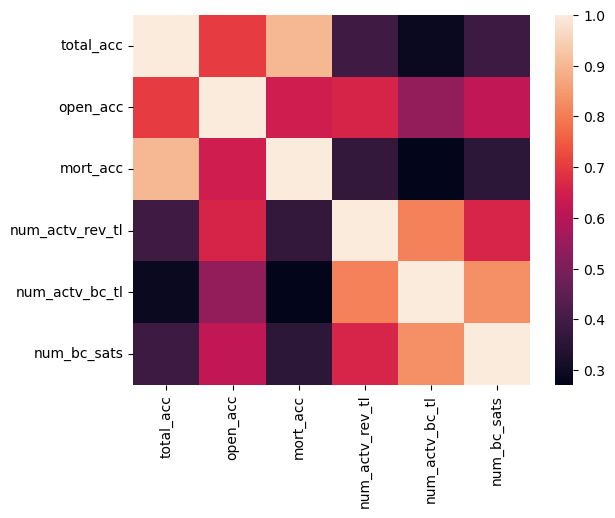

In [90]:
sns.heatmap(df[['total_acc', 'open_acc', 'mort_acc', 'num_actv_rev_tl', 'num_actv_bc_tl', 'num_bc_sats']].corr())

['num_actv_rev_tl', 'num_actv_bc_tl', 'num_bc_sats'] show strong correlation with only 'open_acc' feature

In [91]:
df[['open_acc', 'num_actv_rev_tl', 'num_actv_bc_tl', 'num_bc_sats']].corr()

,open_acc,num_actv_rev_tl,num_actv_bc_tl,num_bc_sats
open_acc,1.000000,0.659564,0.541482,0.617810
num_actv_rev_tl,0.659564,1.000000,0.807668,0.663443
num_actv_bc_tl,0.541482,0.807668,1.000000,0.829309
num_bc_sats,0.617810,0.663443,0.829309,1.000000


Start with 'num_actv_rev_tl' as it has highest correlation with 'open_acc'.

We employ similar technique that we used handle 'mort_acc' feature.

In [92]:
open_acc_list = df['open_acc'].unique()

l = []
for o in open_acc_list:
    l.append((o, round(df[df['open_acc'] == o]['num_actv_rev_tl'].mean())))

num_actv_rev_tl_lookup = pd.DataFrame(l, columns=['open_acc', 'avg_num_actv_rev_tl'])

In [93]:
num_actv_rev_tl_lookup

,open_acc,avg_num_actv_rev_tl
0,7.0,4
1,22.0,10
2,6.0,3
3,12.0,6
4,5.0,3
...,...,...
79,86.0,57
80,88.0,14
81,84.0,9
82,75.0,37


In [94]:
df['num_actv_rev_tl'] = df['open_acc']

num_actv_rev_tl_data = num_actv_rev_tl_lookup.to_dict('split')
num_actv_rev_tl_approx_dict = dict(num_actv_rev_tl_data['data'])

df['num_actv_rev_tl'] = df['num_actv_rev_tl'].map(num_actv_rev_tl_approx_dict)

In [95]:
df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,bc_util,mort_acc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,disbursement_method
0,68407277,3600.0,36 months,13.99,123.03,C,C4,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,PA,5.91,0.0,Aug-2003,7.0,0.0,2765.0,29.7,13.0,Individual,37.2,1,2.0,4,2.0,76.9,0.0,0.0,7746.0,Cash
1,68355089,24700.0,36 months,11.99,820.28,C,C1,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,SD,16.06,1.0,Dec-1999,22.0,0.0,21470.0,19.2,38.0,Individual,27.1,3,5.0,10,13.0,97.4,0.0,0.0,39475.0,Cash
2,68341763,20000.0,60 months,10.78,432.66,B,B4,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,IL,10.78,0.0,Aug-2000,6.0,0.0,7869.0,56.2,18.0,Joint App,55.9,1,2.0,3,2.0,100.0,0.0,0.0,18696.0,Cash
4,68476807,10400.0,60 months,22.45,289.91,F,F1,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,PA,25.37,1.0,Jun-1998,12.0,0.0,21929.0,64.5,35.0,Individual,77.5,2,4.0,6,5.0,96.6,0.0,0.0,95768.0,Cash
5,68426831,11950.0,36 months,13.44,405.18,C,C3,RENT,34000.0,Source Verified,Fully Paid,debt_consolidation,GA,10.20,0.0,Oct-1987,5.0,0.0,8822.0,68.4,6.0,Individual,91.0,0,2.0,3,2.0,100.0,0.0,0.0,12798.0,Cash


In [96]:
pd.DataFrame(df.isnull().sum()).T

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,bc_util,mort_acc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,disbursement_method
0,0,0,0,0,0,0,0,0,0,0,0,0,0,374,0,0,0,0,0,857,0,0,61912,0,67527,0,55841,67681,697,39,47281,0


Now
#### 'num_actv_bc_tl' and 'num_bc_sats'

In [97]:
df[num_columns].corr()['num_bc_sats'].sort_values()

bc_util                -0.176193
revol_util             -0.119336
int_rate               -0.054567
pub_rec_bankruptcies   -0.051553
pub_rec                -0.035158
delinq_2yrs            -0.032417
tax_liens               0.002146
dti                     0.079924
annual_inc              0.122528
pct_tl_nvr_dlq          0.136493
total_bal_ex_mort       0.140650
installment             0.207656
loan_amnt               0.215030
revol_bal               0.272881
mort_acc                0.357985
total_acc               0.389737
num_actv_rev_tl         0.612563
open_acc                0.617810
num_actv_bc_tl          0.829309
num_bc_sats             1.000000
Name: num_bc_sats, dtype: float64

After seeing high correlation and logically thinking for a bit, it is obvious that the number of currently active bankcards will be very close to number of satisfactory bankcard accounts as satisfactory bankcard accounts will be in frequent use.

Hence we drop 'num_actv_bc_tl'

In [98]:
df.drop(axis=1, columns=['num_actv_bc_tl'], inplace=True)

In [99]:
num_columns = df.select_dtypes([float , int]).columns

In [100]:
df[num_columns].corr()['num_bc_sats'].sort_values()

bc_util                -0.176193
revol_util             -0.119336
int_rate               -0.054567
pub_rec_bankruptcies   -0.051553
pub_rec                -0.035158
delinq_2yrs            -0.032417
tax_liens               0.002146
dti                     0.079924
annual_inc              0.122528
pct_tl_nvr_dlq          0.136493
total_bal_ex_mort       0.140650
installment             0.207656
loan_amnt               0.215030
revol_bal               0.272881
mort_acc                0.357985
total_acc               0.389737
num_actv_rev_tl         0.612563
open_acc                0.617810
num_bc_sats             1.000000
Name: num_bc_sats, dtype: float64

even though high correlation with 'open_acc' we can't again fill null values with the same approach. Looking at the size of our dataset we can afford to drop 55841 rows. 

In [101]:
df.dropna(axis=0, subset=['num_bc_sats'], inplace=True)

In [102]:
pd.DataFrame(df.isnull().sum()).T

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,bc_util,mort_acc,num_actv_rev_tl,num_bc_sats,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,disbursement_method
0,0,0,0,0,0,0,0,0,0,0,0,0,0,374,0,0,0,0,0,785,0,0,14511,0,0,0,11840,0,0,0,0


___
#### 'pct_tl_nvr_dlq'

First of all we convert the target feature into numeric form,

In [103]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df.drop(axis=1, columns=['loan_status'], inplace=True)

In [104]:
num_columns = df.select_dtypes([float , int]).columns

In [105]:
df[num_columns].corr()['loan_repaid'].sort_values()

int_rate               -0.259728
dti                    -0.083535
bc_util                -0.066056
loan_amnt              -0.064295
revol_util             -0.058437
installment            -0.050429
open_acc               -0.026988
num_actv_rev_tl        -0.026658
pub_rec                -0.024501
pub_rec_bankruptcies   -0.023543
delinq_2yrs            -0.018275
num_bc_sats            -0.014225
tax_liens              -0.013349
total_bal_ex_mort       0.003933
pct_tl_nvr_dlq          0.010561
total_acc               0.012394
mort_acc                0.014706
revol_bal               0.021261
annual_inc              0.042305
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

'pct_tl_nvr_dlq' has correlation value in the range with other features hence we first try to fill null values else drop the rows. 

In [106]:
df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,bc_util,mort_acc,num_actv_rev_tl,num_bc_sats,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,disbursement_method,loan_repaid
0,68407277,3600.0,36 months,13.99,123.03,C,C4,MORTGAGE,55000.0,Not Verified,debt_consolidation,PA,5.91,0.0,Aug-2003,7.0,0.0,2765.0,29.7,13.0,Individual,37.2,1,4,2.0,76.9,0.0,0.0,7746.0,Cash,1
1,68355089,24700.0,36 months,11.99,820.28,C,C1,MORTGAGE,65000.0,Not Verified,small_business,SD,16.06,1.0,Dec-1999,22.0,0.0,21470.0,19.2,38.0,Individual,27.1,3,10,13.0,97.4,0.0,0.0,39475.0,Cash,1
2,68341763,20000.0,60 months,10.78,432.66,B,B4,MORTGAGE,63000.0,Not Verified,home_improvement,IL,10.78,0.0,Aug-2000,6.0,0.0,7869.0,56.2,18.0,Joint App,55.9,1,3,2.0,100.0,0.0,0.0,18696.0,Cash,1
4,68476807,10400.0,60 months,22.45,289.91,F,F1,MORTGAGE,104433.0,Source Verified,major_purchase,PA,25.37,1.0,Jun-1998,12.0,0.0,21929.0,64.5,35.0,Individual,77.5,2,6,5.0,96.6,0.0,0.0,95768.0,Cash,1
5,68426831,11950.0,36 months,13.44,405.18,C,C3,RENT,34000.0,Source Verified,debt_consolidation,GA,10.20,0.0,Oct-1987,5.0,0.0,8822.0,68.4,6.0,Individual,91.0,0,3,2.0,100.0,0.0,0.0,12798.0,Cash,1


there is no way to fill in those values, hence we try dropping the rows, but we will look for how it impacts the balance of the dataset.

In [107]:
df['loan_repaid'].value_counts()

loan_repaid
1    1029174
0     260295
Name: count, dtype: int64

In [108]:
df.dropna(axis=0, subset=['pct_tl_nvr_dlq'])['loan_repaid'].value_counts()

loan_repaid
1    1019410
0     258219
Name: count, dtype: int64

Mostly removed rows belong to the class having more rows anyways hence we preceed dropping rows.

In [109]:
df.dropna(axis=0, subset=['pct_tl_nvr_dlq'], inplace=True)

____

In [110]:
pd.DataFrame(df.isnull().sum()).T

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,bc_util,mort_acc,num_actv_rev_tl,num_bc_sats,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,disbursement_method,loan_repaid
0,0,0,0,0,0,0,0,0,0,0,0,0,374,0,0,0,0,0,776,0,0,14347,0,0,0,0,0,0,0,0,0


There are very few null records left so we will drop them as well

In [111]:
df.dropna(axis=0, inplace=True)

In [112]:
pd.DataFrame(df.isnull().sum()).T

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,bc_util,mort_acc,num_actv_rev_tl,num_bc_sats,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,disbursement_method,loan_repaid
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
df['loan_repaid'].value_counts()

loan_repaid
1    1007811
0     255106
Name: count, dtype: int64

____

#### 'grade' and 'sub_grade'
The sub_grade feature contains the grade, hence drop the 'grade' 

In [114]:
df.drop(axis=1, columns=['grade'], inplace=True)

___

In [115]:
df.to_csv('cleaned.csv', index=False)


___